Método dos mínimos quadrados

O método dos mínimos quadrados procura coeficientes lineares e angulares que minimize a função de custo e para isto existe uma solução fechada, ou seja, uma equação matemática que entrega a solução diretamente, que é:

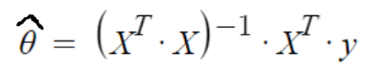

Criando o conjunto de dados:

In [4]:
import numpy as np

np.random.seed(42)  

m = 100  # numero de instâncias
X = 2 * np.random.rand(m, 1)  # vetor x
y = 4 + 3 * X + np.random.randn(m, 1)  # vetor y

Gerando o seguinte gráfico:

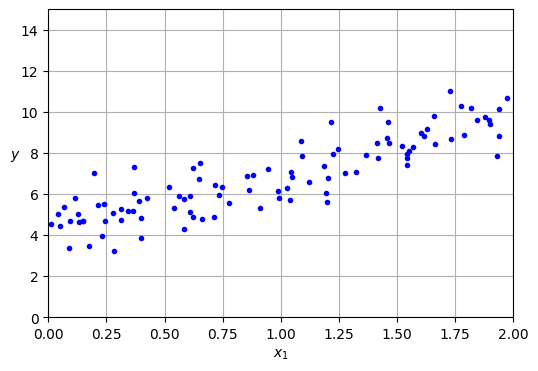

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.show()

Adicionar 1's aos valores do vetor X

In [6]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # adicionando x0 = 1 para cada instância

Calculando os coeficientes angular e linear que melhor se encaixam na regressão linear:

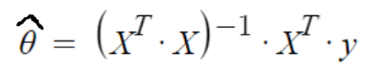

In [7]:
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

Explicando detalhadamente o que é feito no comando anterior:

Primeiro são transpostos os valores de X_b e logo multiplicados pela própria X_b

In [8]:
X_b.T @ X_b

array([[100.        ,  94.03614868],
       [ 94.03614868, 123.47395265]])

A multiplicação de matrizes segue o modelo da seguinte imagem:

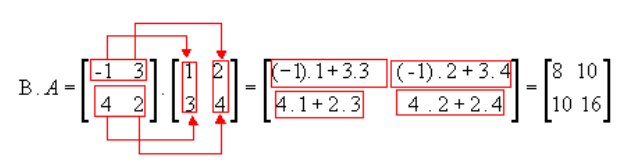

Uma das principais regras para a multiplicação de matrizes é:

- As matrizes devem ter dimensões Compatíveis: Para que a multiplicação de duas matrizes seja possível, o número de colunas da primeira matriz deve ser igual ao número de linhas da segunda matriz. Em outras palavras, se a primeira matriz for de ordem "m x n" e a segunda matriz for de ordem "n x p", as dimensões "n" precisam ser iguais.

Exemplo:

Matriz A: m x n
Matriz B: n x p

Apos isto é calculada a matriz inversa desta multiplicação

In [9]:
np.linalg.inv(X_b.T @ X_b) 

array([[ 0.03523199, -0.02683222],
       [-0.02683222,  0.02853394]])

A matriz inversa é a matriz que quando multiplicada pela própria matriz gera a matriz identidade, como na seguinte imagem:

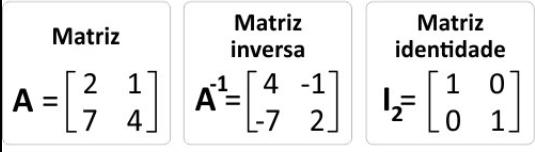

Podemos conferir e veremos que a matriz identidade é mesmo o resultado desta multiplicação

In [10]:
np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(X_b))

array([[ 1.00000000e+00, -3.85820311e-16],
       [ 1.50391345e-17,  1.00000000e+00]])

os valores que não são exatamente iguais a zero são por conta de precisão numérica já que em computação, pode haver problemas de precisão numérica. Portanto, é possível que, em alguns casos, a multiplicação da matriz inversa pela matriz original não resulte exatamente na matriz de identidade, mas em valores muito próximos.

Em seguida a matriz inversa é multiplicada pela matriz X_b transposta e a transposição de uma matriz segue o seguinte modelo:

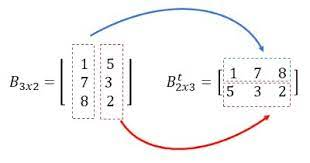

Devemos ter em mente que estamos multiplicando uma matriz 2x2 por uma matriz 2x100

e irá ocorrer da seguinte forma:

Utilizando A e B como exemplo

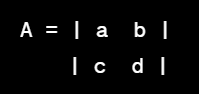

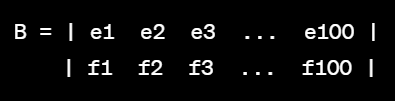

Multiplicação de A 2x2 por B 2x100(2 primeiras colunas de B):

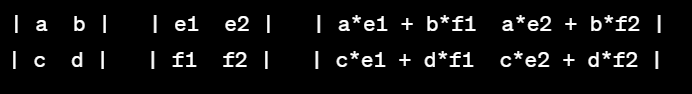

Em seguida, movemos para a próxima seção de B (colunas 3 e 4 de B) e repetimos o processo:

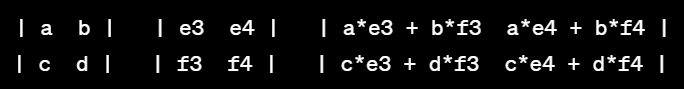

E repetimos isto até realizarmos com todas colunas de B



In [11]:
np.linalg.inv(X_b.T @ X_b) @ X_b.T

array([[ 0.0151325 , -0.01578757, -0.00405006,  0.00310531,  0.02685933,
         0.02686063,  0.03211496, -0.01125087,  0.00297349, -0.00276633,
         0.03412733, -0.01681768, -0.00944058,  0.02383693,  0.02547445,
         0.02538969,  0.018905  ,  0.00707123,  0.0120519 ,  0.01960334,
         0.00239724,  0.02774613,  0.01955421,  0.01557138,  0.01075725,
        -0.00690404,  0.02451661,  0.00763588,  0.00344039,  0.03273925,
         0.00262843,  0.02608091,  0.03174103, -0.01568943, -0.01658812,
        -0.00815021,  0.01888506,  0.02999047, -0.001487  ,  0.01161145,
         0.02868287,  0.00865859,  0.03338655, -0.01356618,  0.0213447 ,
        -0.0003219 ,  0.01850419,  0.00732283,  0.00589309,  0.02531188,
        -0.01680023, -0.00636508, -0.0151857 , -0.01278842,  0.00314602,
        -0.01423988,  0.03048309,  0.02471468,  0.03280489,  0.01777332,
         0.01437384,  0.02067019, -0.00924175,  0.01608702,  0.02015579,
         0.0061085 ,  0.02766937, -0.00781747,  0.0

Então chegamos na operação final:

que é a multiplicação de uma matriz 2x100 por uma matriz 100x1

In [19]:
np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

array([[4.21509616],
       [2.77011339]])

y é um vetor unidimensional de valores dependentes de X que calculamos anteriormente, e na linha anterior multiplicamos a matriz identidade pelo vetor unidimensional y

O resultado final dessa multiplicação de matrizes é frequentemente usado na resolução de problemas de regressão linear, onde X_b representa uma matriz de características, y representa um vetor de valores-alvo e o resultado contém os coeficientes da regressão que melhor se ajustam aos dados.

O resultado foi o seguinte:

In [13]:
theta_best

array([[4.21509616],
       [2.77011339]])

Próximo do que utilizamos para gerar a função que foi o coeficiente linear igual a 4 e angular igual a 3 ao invés de 4,215 e 2,77. Perto porém o ruído cria a impossibilidade de recuperar os parâmetros exatos da função original.

Agora podemos fazer previsões dos próximos valores utilizando os coeficientes:

In [14]:
#cria um vetor de uma linha e duas colunas
X_new = np.array([[0], [2]]) #matriz 1x2

# adicionando 1's às instâncias
X_new_b = add_dummy_feature(X_new) #matriz 1x2 com 2 valores em cada instância

# multiplica os valores da matriz pela matriz dos coeficientes e retornando os valores previstos para as novas instâncias
y_predict = X_new_b @ theta_best
y_predict


array([[4.21509616],
       [9.75532293]])

Então obteremos a seguinte reta para novas predições:

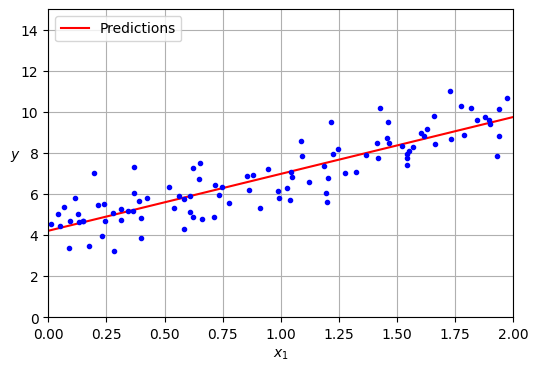

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) 
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

Todo esse trabalho não é necessário para obter uma regressão linear pois podemos utilizar o Scikit-Learn da seguinte forma:

In [16]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

E prever novos valores, assim:

In [17]:
y_predict = lin_reg.predict(X_new)

E plotando os gráficos vemos que teremos os mesmos resultados:

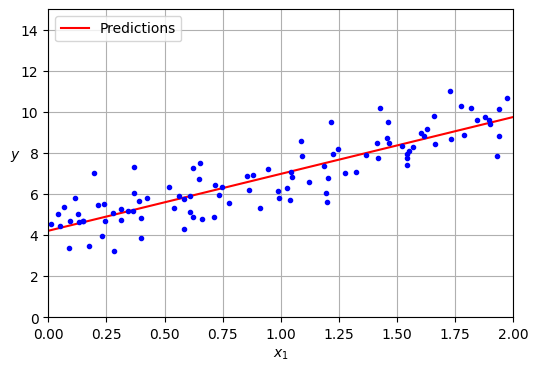

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4)) 
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()